# Introduction to scikit-learn API

- This tutorial introduces the usage of simple and efficient scikit-learn API.

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

### Load and preprocess iris flowers dataset

In [2]:
iris = datasets.load_iris() # returns scikit-learn's bunch object that contains 'data', 'target', 'feature_names' etc.
X = iris.data[:, [2, 3]] # features
y = iris.target # targets (labels)

In [3]:
print(iris.feature_names)
print(iris.target_names)
print('Class label (integer encoding):', np.unique(y))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
Class label (integer encoding): [0 1 2]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# randomly divides dataset into training and test data using test_size ratio 7 (train) : 3 (test) 

In [5]:
# Feature standardization using scikit-learn API

sc = StandardScaler() # load StandardScaler class and initialize new StandardScaler object to the variable
sc.fit(X_train) # calculate the mean and std of each feature in training data
# standardize both training and test data using the values previously calculated
X_train_std = sc.transform(X_train) 
X_test_std = sc.transform(X_test)

### Train a perceptron model using scikit-learn API

In [6]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [7]:
# calculate accuracy of the perceptron model
print('Accuracy: {:.3f}'.format(ppn.score(X_test_std, y_test)))

Accuracy: 0.978


In [8]:
def display_decision_boundary(X, y, classifier, test_idx=None, step=0.02):
    markers = ('o', 'x', 's', '^', 'v')
    colors = ['red', 'blue', 'green', 'yellow', 'gray']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # display a decision boundary
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    # cdts is a short-form of coordinates
    # np.meshgrid returns coordinate matrices from coordinate vectors
    x1_cdts, x2_cdts = np.meshgrid(np.arange(x1_min-1, x1_max+1, step), np.arange(x2_min-1, x2_max+1, step))
    Z = classifier.predict(np.array([x1_cdts.ravel(), x2_cdts.ravel()]).T) # transpose an array using .T
    Z = Z.reshape(x1_cdts.shape)
    plt.contourf(x1_cdts, x2_cdts, Z, alpha=0.3, cmap=cmap)
    plt.xlim(x1_cdts.min(), x1_cdts.max())
    plt.ylim(x2_cdts.min(), x2_cdts.max())

    labels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1], # use of boolean masks
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=labels[cl],
        )
    
    # plot test data differently; use circle
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(x=X_test[:, 0],
                    y=X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test'
                   )

### Display a decision boundary

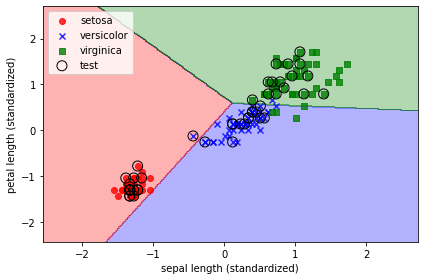

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
display_decision_boundary(X_combined_std, y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('sepal length (standardized)')
plt.ylabel('petal length (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()